<a href="https://colab.research.google.com/github/ju-vargas/Classificacao-e-Pesquisa-de-Dados/blob/main/Lab01/labCPD_01_CPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Disciplina de Classificação e Pesquisa de Dados

### Implementação (em C/C++) dos principais algoritmos de Classificação por Inserção



A seguir você encontra exemplos de como criar e compilar arquivos em c/cpp nessa plataforma (Google Colab). 

Essa plataforma nos permite criar células de código intercaladas com células de texto (como esta). Ele funciona justamente como um bloco de notas, onde você faz anotações em células (em forma de código ou texto) que podem ser executadas. O resultado da execução é salvo e você pode criar outras células para testar variações, sem perder os resultados anteriores, podendo comparar os resultados e as evoluções em um único arquivo.

Depois dos trechos iniciais de exemplo de criação e compilação de arquivos, você encontra uma versão do algoritmo de inserção direta com busca linear, que conta a quantidade de trocas e comparações realizadas para ordenar o array passado.

Também encontra um algoritmo de inserção direta com busca binária, que chama uma função auxiliar (incompleta) que faz a busca. Uma de suas atividades do laboratório de hoje é implementar essa função. Não esqueça que as operações de comparação e troca executadas por ela também devem ser consideradas.

Finalmente, encontra a função shellsort (incompleta). Você deve implementar essa função, considerando o que estudamos em aula. Utilize qualquer sequência de intervalos, iniciando pelo maior (mas menor que a quantidade de elementos no array) e diminuindo até que o intervalo seja 1. Não se esqueça de contar a quantidade de comparações e trocas.

In [ ]:
# Exemplo de arquivo em cpp

# A linha seguinte informa onde salvar o programa (nome do arquivo)
%%writefile sorting.cpp               

#include<iostream>

int main(void){
    std::cout << "Olá mundo!";
    return 0;
}

Overwriting sorting.cpp


A célula seguinte ilustra como compilar o programa e executá-lo.

Repare que é necessário executar um comando no BASH e, para isso, usa-se a mágica `%%script bash`.

In [ ]:
%%script bash
g++ sorting.cpp -o sorting            # compila o arquivo salvo na célula anterior
./sorting                             # executa

Olá mundo!

Para ver os arquivos na pasta atual do Google Colab, use o comando `ls`, como no exemplo:

In [ ]:
%%script bash
ls -laX                               # mostra arquivos da pasta atual

total 52
drwxr-xr-x 1 root root  4096 Dec  2 14:34 sample_data
-rwxr-xr-x 1 root root 24872 Dec  6 17:43 sorting
drwxr-xr-x 1 root root  4096 Dec  6 17:43 .
drwxr-xr-x 1 root root  4096 Dec  6 16:48 ..
drwxr-xr-x 4 root root  4096 Dec  2 14:33 .config
-rw-r--r-- 1 root root  6244 Dec  6 17:42 sorting.cpp


# Código

---

O código seguinte implementa uma função `main` que cria um array dinâmico de tamanho `MAX`, inicialmente de 50 elementos. 

Inicialmente, o array criado é do tipo decrescente, mas há trechos (comentados) que podem gerá-lo de maneira crescente ou totalmente aleatória. 

Execute o código uma vez e, após, copie-o e cole-o em uma nova célula, para não perder os resultados. Nela, tente outro tipo de array (descomente a linha que cria o tipo desejado). Também tente com outros tamanhos de array. Você pode testar cada tipo e tamanho em uma célula diferente (acrescentando células e copiando e colando o seu conteúdo) ou pode modificar o código para que ele teste todas as opções, uma após a outra, adicionando laços e lógica de programação adequada para isso.

##Original

In [ ]:
%%writefile sorting.cpp
// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>

//TODO: executar várias vezes os algoritmos, com tamanhos diferentes (e.g., 100, 1000 e 10000)

#define MAX 50                                                                  // quantidade de números no array

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de comparações e trocas  
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

loginfo_t insertion_sort(array_t, array_size_t);
loginfo_t insertion_sortBB(array_t, array_size_t);
loginfo_t shellsort(array_t, array_size_t);
std::tuple<int, int, int> busca_binaria(array_t, int, int, int);                // retorna uma tupla contendo <posicao, qtd de trocas, qtd de comparações>

int main(void){    
    // cout << __cplusplus << endl;                                             // verifica versão do compilador
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT
    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)

    int* array = new int[MAX];                                                  // array dinâmico que armazena os números

    // testar com as 3 versões de array (aleatório, crescente e decrescente):
    // for(auto i=0;i<MAX;i++) array[i] = distrib(rng);                         // gera números aleatórios para o array
    //for(auto i=0;i<MAX;i++) array[i] = i;                                     // gera números em ordem crescente
    for(auto i=0;i<MAX;i++) array[i] = MAX-i;                                   // gera números em ordem decrescente
    
    cout << "Array gerado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    // TODO: testar os outros algoritmos (insertion_sortBB e shellsort)
    loginfo = insertion_sort(array, MAX);

    //TODO: armazenar essas informações em um matriz ou hashtable

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;

    // TODO: mostrar informações de execução de todos os algoritmos

    delete[] array;
    return 0;
}

// Função de Inserção Direta com Busca Linear
loginfo_t insertion_sort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    for(int i=1;i<array_size;i++){                                              // do segundo ao último
        auto chave = array[i];                                                  // chave a inserir no subarray ordenado
        auto j = i-1;                                                           // último elemento do subarray ordenado         
        comparacoes = comparacoes + 1;
        while(j >= 0 && array[j] > chave){                                      // busca linear da direita para a esquerda no subarray ordenado   
            comparacoes = comparacoes + 1;
            array[j+1] = array[j];
            j = j - 1;
            trocas = trocas + 1;
        }
        if(j+1 != i){ 
           array[j+1] = chave;
           trocas = trocas + 1;
       }
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

loginfo_t insertion_sortBB(array_t array, array_size_t array_size){    
   int trocas = 0, comparacoes = 0;
   std::tuple<int, int, int> info;
   int i, local, j, k, elemento;
   for(i = 1; i < array_size; ++i) {
      j = i - 1;
      elemento = array[i];
      info = busca_binaria(array, elemento, 0, j);
      local = get<0>(info);
      trocas += get<1>(info);
      comparacoes += get<2>(info)+1;
      while (j >= local) {
         trocas++;
         array[j+1] = array[j];
         j--;
      }
      if(j+1 != i){ 
           array[j+1] = elemento;
           trocas = trocas + 1;
       }
   }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

// *****************************************************
//  TODO: Implementação dos seus algoritmos (a seguir)

// Faz busca binária do 'elemento' no 'array', entre os índices 'inicio' e 'fim'
// retorna posição do elemento, quantidade de trocas e quantidade de comparações

std::tuple<int, int, int> busca_binaria(array_t array, int elemento, int inicio, int fim){
   int comparacoes = 0, trocas = 0, meio = (fim-inicio)/2;

  // defina aqui sua versão da função de busca binária
   //for(i = 1; i < array_size; ++i) {
     //elemento = array[i];
     //if 

   //}
   return make_tuple(meio, trocas, comparacoes);                                // retorna posição do elemento e quantidade de operações
}

loginfo_t shellsort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    
    // defina aqui sua versão da função shellsort    
    
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

Writing sorting.cpp


## Busca Binária

In [ ]:
%%writefile sorting.cpp


// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>

//TODO: executar várias vezes os algoritmos, com tamanhos diferentes (e.g., 100, 1000 e 10000)

#define MAX 10                                                                  // quantidade de números no array

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de comparações e trocas  
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

loginfo_t insertion_sort(array_t, array_size_t);
loginfo_t insertion_sortBB(array_t, array_size_t);
loginfo_t shellsort(array_t, array_size_t);
std::tuple<int, int, int> busca_binaria(array_t, int, int, int);                // retorna uma tupla contendo <posicao, qtd de trocas, qtd de comparações>

int main(void){    
    // cout << __cplusplus << endl;                                             // verifica versão do compilador
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT
    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)

    int* array = new int[MAX];                                                  // array dinâmico que armazena os números

    // testar com as 3 versões de array (aleatório, crescente e decrescente):
    //for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;                         // gera números aleatórios para o array
    //for(auto i=0;i<MAX;i++) array[i] = i;                                     // gera números em ordem crescente
    for(auto i=0;i<MAX;i++) array[i] = MAX-i;                                   // gera números em ordem decrescente
    
    cout << "Array gerado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    // TODO: testar os outros algoritmos (insertion_sortBB e shellsort)
    loginfo = insertion_sortBB(array, MAX);

    //TODO: armazenar essas informações em um matriz ou hashtable

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;

    // TODO: mostrar informações de execução de todos os algoritmos

    delete[] array;
    return 0;
}

// Função de Inserção Direta com Busca Linear
loginfo_t insertion_sort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    for(int i=1;i<array_size;i++){                                              // do segundo ao último
        auto chave = array[i];                                                  // chave a inserir no subarray ordenado
        auto j = i-1;                                                           // último elemento do subarray ordenado         
        comparacoes = comparacoes + 1;
        while(j >= 0 && array[j] > chave){                                      // busca linear da direita para a esquerda no subarray ordenado   
            comparacoes = comparacoes + 1;
            array[j+1] = array[j];
            j = j - 1;
            trocas = trocas + 1;
        }
        if(j+1 != i){ 
           array[j+1] = chave;
           trocas = trocas + 1;
       }
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}
/* INSERTION SORT COM BUSCA BINÁRIA
> O primeiro elemento do array está ordenado, e o resto não.
> Um por um, os outros elementos são colocados na parte ordenada. 
> Seu lugar na parte ordenada é encontrado com busca binaria 

*/

loginfo_t insertion_sortBB(array_t array, array_size_t array_size){    
   int trocas = 0, comparacoes = 0;
   std::tuple<int, int, int> info;
   int i, local, j, k, elemento;

   for(i = 1; i < array_size; i++) {
        j = i - 1;                                   // j é esse primeiro elemento já ordenado. depois, é o fim dos elementos ordenados. 
      
        elemento = array[i];                  
        info = busca_binaria(array, elemento,0,j);   // pego o elemento i, e descubro onde ele esta no array ordenado (?). percorro array de 0 a j
                                                   // ele nao vai estar em nenhum lugar! mas vou saber onde inserir
      
        local = get<0>(info);                        //pego o valor retornado pela tupla. no primeiro elemento, vai ser 0, mas deveria ser 1??
        trocas += get<1>(info);
        comparacoes += get<2>(info)+1;

        while (j >= local) {                         // aqui, eu faço as trocas necessárias pra colocar o elemento onde deve estar no array
            trocas++;                                 //"abre espaço", empurro pro final
            array[j+1] = array[j];
            j--;
        }
        if(j+1 != i){                                 //troca oficial
            array[j+1] = elemento;
            trocas++;
        }
   }
    return make_tuple(trocas, comparacoes);       // retorna quantidade de operações
}

// *****************************************************
//  TODO: Implementação dos seus algoritmos (a seguir)

// Faz busca binária do 'elemento' no 'array', entre os índices 'inicio' e 'fim'
// retorna posição do elemento, quantidade de trocas e quantidade de comparações

std::tuple<int, int, int> busca_binaria(array_t array, int elemento, int inicio, int fim){
    int comparacoes = 0,                     
    trocas = 0,
    meio = ((fim - inicio) / 2)+ inicio;

    //esse jogo de meio-1, meio+1 e inicio>1, possibilita q o primeiro tenha meio 1 
    //mas, tirar os extremos é o modo de fazer busca binaria
    //o ponto é que assim, se fosse inicio == fim, daria erro na verificação, pq antes disso seria menor (?)

    if (inicio>fim) {                                               //nao foi achado, e acabou a procura.
        comparacoes++; 
        return  make_tuple(meio, trocas, comparacoes); 
    }                      
    if (array[meio] > elemento)  {                                  //se o meio é maior, fim agora é meio menos 1, inicio continua igual
        comparacoes = comparacoes+2; 
        return busca_binaria(array, elemento, inicio, meio-1);
    } 
    if (array[meio] == elemento) {                                  //foi achado (será colocado no lugar onde foi achado, e move esse)
        comparacoes = comparacoes+3; 
        return  make_tuple(meio, trocas, comparacoes); 
    }        
    return busca_binaria(array, elemento, meio+1, fim);             //nao sendo, ele cai aqui. logo, o meio é menor q o elemento. 
}

loginfo_t shellsort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    
    // defina aqui sua versão da função shellsort    
    
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

Overwriting sorting.cpp


## Shell Sort

In [ ]:
%%writefile sorting.cpp


// Atenção: usa código C++11
// para saber se o seu compilador tem suporte, execute: 
// cout << __cplusplus;
// O resultado deve ser 201103L ou maior.
// o do google collab é C++14 
// A grande maioria dos compiladores atuais suporta nativamente c++11. 
// Outros exigem a configuração de parâmetros de compilação... Verifique a documentação do seu.

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>

//TODO: executar várias vezes os algoritmos, com tamanhos diferentes (e.g., 100, 1000 e 10000)

#define MAX 10                                                                  // quantidade de números no array

using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de comparações e trocas  
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

loginfo_t insertion_sort(array_t, array_size_t);
loginfo_t insertion_sortBB(array_t, array_size_t);
loginfo_t shellsort(array_t, array_size_t);
std::tuple<int, int, int> busca_binaria(array_t, int, int, int);                // retorna uma tupla contendo <posicao, qtd de trocas, qtd de comparações>

int main(void){    
    // cout << __cplusplus << endl;                                             // verifica versão do compilador
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT
    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)

    int* array = new int[MAX];                                                  // array dinâmico que armazena os números

    // testar com as 3 versões de array (aleatório, crescente e decrescente):
    //for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;                         // gera números aleatórios para o array
    //for(auto i=0;i<MAX;i++) array[i] = i;                                     // gera números em ordem crescente
    for(auto i=0;i<MAX;i++) array[i] = MAX-i;                                   // gera números em ordem decrescente

    cout << "Array gerado: ";
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    // TODO: testar os outros algoritmos (insertion_sortBB e shellsort)
    loginfo = shellsort(array, MAX);

    //TODO: armazenar essas informações em um matriz ou hashtable

    cout << endl << "Array ordenado: ";                               
    for(auto i=0;i<MAX;i++) cout << array[i] << " ";

    cout << endl;
    cout << "Quantidade de trocas: " << get<0>(loginfo) << endl;
    cout << "Quantidade de comparações: " << get<1>(loginfo) << endl;

    // TODO: mostrar informações de execução de todos os algoritmos

    delete[] array;
    return 0;
}

// Função de Inserção Direta com Busca Linear
loginfo_t insertion_sort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    for(int i=1;i<array_size;i++){                                              // do segundo ao último
        auto chave = array[i];                                                  // chave a inserir no subarray ordenado
        auto j = i-1;                                                           // último elemento do subarray ordenado         
        comparacoes = comparacoes + 1;
        while(j >= 0 && array[j] > chave){                                      // busca linear da direita para a esquerda no subarray ordenado   
            comparacoes = comparacoes + 1;
            array[j+1] = array[j];
            j = j - 1;
            trocas = trocas + 1;
        }
        if(j+1 != i){ 
           array[j+1] = chave;
           trocas = trocas + 1;
       }
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}
/* INSERTION SORT COM BUSCA BINÁRIA
> O primeiro elemento do array está ordenado, e o resto não.
> Um por um, os outros elementos são colocados na parte ordenada. 
> Seu lugar na parte ordenada é encontrado com busca binaria 
*/

loginfo_t insertion_sortBB(array_t array, array_size_t array_size){    
   int trocas = 0, comparacoes = 0;
   std::tuple<int, int, int> info;
   int i, local, j, k, elemento;

   for(i = 1; i < array_size; i++) {
        j = i - 1;                                   // j é esse primeiro elemento já ordenado. depois, é o fim dos elementos ordenados. 

        elemento = array[i];                  
        info = busca_binaria(array, elemento,0,j);   // pego o elemento i, e descubro onde ele esta no array ordenado (?). percorro array de 0 a j
                                                   // ele nao vai estar em nenhum lugar! mas vou saber onde inserir

        local = get<0>(info);                        //pego o valor retornado pela tupla. no primeiro elemento, vai ser 0, mas deveria ser 1??
        trocas += get<1>(info);
        comparacoes += get<2>(info)+1;

        while (j >= local) {                         // aqui, eu faço as trocas necessárias pra colocar o elemento onde deve estar no array
            trocas++;                                 //"abre espaço", empurro pro final
            array[j+1] = array[j];
            j--;
        }
        if(j+1 != i){                                 //troca oficial
            array[j+1] = elemento;
            trocas++;
        }
   }
    return make_tuple(trocas, comparacoes);       // retorna quantidade de operações
}

// *****************************************************
//  TODO: Implementação dos seus algoritmos (a seguir)

// Faz busca binária do 'elemento' no 'array', entre os índices 'inicio' e 'fim'
// retorna posição do elemento, quantidade de trocas e quantidade de comparações

std::tuple<int, int, int> busca_binaria(array_t array, int elemento, int inicio, int fim){
    int comparacoes = 0,                     
    trocas = 0,
    meio = ((fim - inicio) / 2)+ inicio;

    //esse jogo de meio-1, meio+1 e inicio>1, possibilita q o primeiro tenha meio 1 
    //mas, tirar os extremos é o modo de fazer busca binaria
    //o ponto é que assim, se fosse inicio == fim, daria erro na verificação, pq antes disso seria menor (?)

    if (inicio>fim) {                                               //nao foi achado, e acabou a procura.
        comparacoes++; 
        return  make_tuple(meio, trocas, comparacoes); 
    }                      
    if (array[meio] > elemento)  {                                  //se o meio é maior, fim agora é meio menos 1, inicio continua igual
        comparacoes = comparacoes+2; 
        return busca_binaria(array, elemento, inicio, meio-1);
    } 
    if (array[meio] == elemento) {                                  //foi achado (será colocado no lugar onde foi achado, e move esse)
        comparacoes = comparacoes+3; 
        return  make_tuple(meio, trocas, comparacoes); 
    }        
    return busca_binaria(array, elemento, meio+1, fim);             //nao sendo, ele cai aqui. logo, o meio é menor q o elemento. 
}

loginfo_t shellsort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    int h = 1; 
    int k = 1; 
    int chave, i; 

    //gap h baseado no algoritmo de Knuth O (n^3/2)
    while (h < array_size) {
        h =  (pow(3,k) - 1)/2; 
        k++; 
    }
    while (h>0) {

        for (int j = h; j<array_size; j++) {
            chave = array[j]; 
            i = (j-h);
            comparacoes++;                                                  //comparo array[i] com chave abaixo
            while (i>=0 && array[i]>chave) {
                array[i+h] = array[i];
                trocas++;                                                  
                i = i-h;
            } 
            array[i+h] = chave;
            trocas++; 
        }
        /* para ver visualmente como está ordenando
        cout << "\n"; 
        for (int u=0; u<array_size; u++) {
            if(u%h == 0)
                cout << "|"<< array[u] <<"|";
            else 
                cout << " "<< array[u] <<" ";
        }
        cout << "\n"; 
        */
        h = (h+1)/3;
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

Writing sorting.cpp


## Completo (Rodar para testes)

In [13]:
%%writefile sorting.cpp

#include<iostream>
#include<tuple>
#include<random>
#include<bits/stdc++.h>
#include <string>


//TODO: executar várias vezes os algoritmos, com tamanhos diferentes (e.g., 100, 1000 e 10000)


using namespace std;

typedef int array_size_t;                                                       // Tipo para especificar tamanho do array
typedef int* array_t;                                                           // Tipo para especificar formato do array
typedef std::tuple<int, int> loginfo_t;                                         // armazena contagem de comparações e trocas  
typedef std::tuple<std::string, int, int> loginfo_teste;
typedef std::mt19937 MyRNG;                                                     // Gerador de números aleatórios do tipo Mersenne Twister Random Generator 

MyRNG rng;                                                                      // gerador de números aleatórios
uint32_t seed_val;                                                              // semente de geração de números

loginfo_t insertion_sort(array_t, array_size_t);
loginfo_t insertion_sortBB(array_t, array_size_t);
loginfo_t shellsort(array_t, array_size_t);
std::tuple<int, int, int> busca_binaria(array_t, int, int, int);                // retorna uma tupla contendo <posicao, qtd de trocas, qtd de comparações>

int main(void){    
    // cout << __cplusplus << endl;                                             // verifica versão do compilador
    rng.seed(seed_val);                                                         // inicializa semente de geração de números aleatórios    
    uniform_int_distribution<> distrib(0, INT_MAX);                             // cria gerador com distribuição uniforme entre 0 e MAX_INT
    loginfo_t loginfo;                                                          // armazena contadores de comparações e trocas (ver typedef acima)

    int MAX = 50; 
    int* array = new int[MAX];                                                  // array dinâmico que armazena os números
    loginfo_teste* array_teste = new loginfo_teste[27];


    MAX = 10;
    int j = 0; 
        for (int u = 0; u < 3; u++) { 
            int* array = new int[MAX]; 
            //aleatorio
            for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;
            get<0>(array_teste[j]) = "ALEATORIO - Insertion"; 
            get<1>(array_teste[j]) = get<0>(insertion_sort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sort(array, MAX));

            for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;
            get<0>(array_teste[j]) = "ALEATORIO - Insertion BB"; 
            get<1>(array_teste[j]) = get<0>(insertion_sortBB(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sortBB(array, MAX));

            for(auto i=0;i<MAX;i++) array[i] = distrib(rng)%51;
            get<0>(array_teste[j]) = "ALEATORIO - ShellSort"; 
            get<1>(array_teste[j]) = get<0>(shellsort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(shellsort(array, MAX));

            //crescente
            for(auto i=0;i<MAX;i++) array[i] = i;
            get<0>(array_teste[j]) = "CRESCENTE - Insertion"; 
            get<1>(array_teste[j]) = get<0>(insertion_sort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sort(array, MAX));

            for(auto i=0;i<MAX;i++) array[i] = i;
            get<0>(array_teste[j]) = "CRESCENTE - Insertion BB"; 
            get<1>(array_teste[j]) = get<0>(insertion_sortBB(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sortBB(array, MAX));
            
            for(auto i=0;i<MAX;i++) array[i] = i;
            get<0>(array_teste[j]) = "CRESCENTE - ShellSort"; 
            get<1>(array_teste[j]) = get<0>(shellsort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(shellsort(array, MAX));
            
            //decrescente
            for(auto i=0;i<MAX;i++) array[i] = MAX-i;
            get<0>(array_teste[j]) = "DECRESCENTE - Insertion"; 
            get<1>(array_teste[j]) = get<0>(insertion_sort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sort(array, MAX));

            for(auto i=0;i<MAX;i++) array[i] = MAX-i;
            get<0>(array_teste[j]) = "DECRESCENTE - Insertion BB"; 
            get<1>(array_teste[j]) = get<0>(insertion_sortBB(array, MAX));
            get<2>(array_teste[j++]) = get<1>(insertion_sortBB(array, MAX));

            for(auto i=0;i<MAX;i++) array[i] = MAX-i;
            get<0>(array_teste[j]) = "DECRESCENTE - ShellSort"; 
            get<1>(array_teste[j]) = get<0>(shellsort(array, MAX));
            get<2>(array_teste[j++]) = get<1>(shellsort(array, MAX));

            delete[] array;
            MAX = MAX * 10; 
        }

    cout << endl ;
    int tamanho = 10; 

    for (int j = 0; j < 3; j++) {      
        cout << "\n\nTamanho: "<<tamanho << "\n"; 

        for (int i = 0; i<9; i++){
            cout << get<0>(array_teste[i + 9*j]) << "\n";
            cout << "Quantidade de trocas: " << get<1>(array_teste[i + 9*j]) << "\n";
            cout << "Quantidade de comparações: " << get<2>(array_teste[i + 9*j]) << "\n\n";
        }
        tamanho = tamanho * 10; 
    }


    

    // TODO: mostrar informações de execução de todos os algoritmos
    delete[] array_teste;
    return 0;
}





// Função de Inserção Direta com Busca Linear
loginfo_t insertion_sort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    for(int i=1;i<array_size;i++){                                              // do segundo ao último
        auto chave = array[i];                                                  // chave a inserir no subarray ordenado
        auto j = i-1;                                                           // último elemento do subarray ordenado         
        comparacoes = comparacoes + 1;
        while(j >= 0 && array[j] > chave){                                      // busca linear da direita para a esquerda no subarray ordenado   
            comparacoes = comparacoes + 1;
            array[j+1] = array[j];
            j = j - 1;
            trocas = trocas + 1;
        }
        if(j+1 != i){ 
           array[j+1] = chave;
           trocas = trocas + 1;
       }
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}
/* INSERTION SORT COM BUSCA BINÁRIA
> O primeiro elemento do array está ordenado, e o resto não.
> Um por um, os outros elementos são colocados na parte ordenada. 
> Seu lugar na parte ordenada é encontrado com busca binaria 
*/

loginfo_t insertion_sortBB(array_t array, array_size_t array_size){    
   int trocas = 0, comparacoes = 0;
   std::tuple<int, int, int> info;
   int i, local, j, k, elemento;

   for(i = 1; i < array_size; i++) {
        j = i - 1;                                   // j é esse primeiro elemento já ordenado. depois, é o fim dos elementos ordenados. 

        elemento = array[i];                  
        info = busca_binaria(array, elemento,0,j);   // pego o elemento i, e descubro onde ele esta no array ordenado (?). percorro array de 0 a j
                                                   // ele nao vai estar em nenhum lugar! mas vou saber onde inserir

        local = get<0>(info);                        //pego o valor retornado pela tupla. no primeiro elemento, vai ser 0, mas deveria ser 1??
        trocas += get<1>(info);
        comparacoes += get<2>(info)+1;

        while (j >= local) {                         // aqui, eu faço as trocas necessárias pra colocar o elemento onde deve estar no array
            trocas++;                                 //"abre espaço", empurro pro final
            array[j+1] = array[j];
            j--;
        }
        if(j+1 != i){                                 //troca oficial
            array[j+1] = elemento;
            trocas++;
        }
   }
    return make_tuple(trocas, comparacoes);       // retorna quantidade de operações
}

// *****************************************************
//  TODO: Implementação dos seus algoritmos (a seguir)

// Faz busca binária do 'elemento' no 'array', entre os índices 'inicio' e 'fim'
// retorna posição do elemento, quantidade de trocas e quantidade de comparações

std::tuple<int, int, int> busca_binaria(array_t array, int elemento, int inicio, int fim){
    int comparacoes = 0,                     
    trocas = 0,
    meio = ((fim - inicio) / 2)+ inicio;

    //esse jogo de meio-1, meio+1 e inicio>1, possibilita q o primeiro tenha meio 1 
    //mas, tirar os extremos é o modo de fazer busca binaria
    //o ponto é que assim, se fosse inicio == fim, daria erro na verificação, pq antes disso seria menor (?)

    if (inicio>fim) {                                               //nao foi achado, e acabou a procura.
        comparacoes++; 
        return  make_tuple(meio, trocas, comparacoes); 
    }                      
    if (array[meio] > elemento)  {                                  //se o meio é maior, fim agora é meio menos 1, inicio continua igual
        comparacoes = comparacoes+2; 
        return busca_binaria(array, elemento, inicio, meio-1);
    } 
    if (array[meio] == elemento) {                                  //foi achado (será colocado no lugar onde foi achado, e move esse)
        comparacoes = comparacoes+3; 
        return  make_tuple(meio, trocas, comparacoes); 
    }        
    return busca_binaria(array, elemento, meio+1, fim);             //nao sendo, ele cai aqui. logo, o meio é menor q o elemento. 
}

loginfo_t shellsort(array_t array, array_size_t array_size){
    int trocas = 0, comparacoes = 0;
    int h = 1; 
    int k = 1; 
    int chave, i; 

    //gap h baseado no algoritmo de Knuth O (n^3/2)
    while (h < array_size) {
        h =  (pow(3,k) - 1)/2; 
        k++; 
    }
    while (h>0) {

        for (int j = h; j<array_size; j++) {
            chave = array[j]; 
            i = (j-h);
            comparacoes++;                                                  //comparo array[i] com chave abaixo
            while (i>=0 && array[i]>chave) {
                array[i+h] = array[i];
                trocas++;                                                  
                i = i-h;
            } 
            array[i+h] = chave;
            trocas++; 
        }
      
        h = (h+1)/3;
    }
    return make_tuple(trocas, comparacoes);                                     // retorna quantidade de operações
}

Overwriting sorting.cpp


## Testes

In [14]:
%%script bash
g++ sorting.cpp -o sorting            

In [15]:
%%script bash
./sorting                             




Tamanho: 10
ALEATORIO - Insertion
Quantidade de trocas: 36
Quantidade de comparações: 9

ALEATORIO - Insertion BB
Quantidade de trocas: 39
Quantidade de comparações: 20

ALEATORIO - ShellSort
Quantidade de trocas: 35
Quantidade de comparações: 15

CRESCENTE - Insertion
Quantidade de trocas: 0
Quantidade de comparações: 9

CRESCENTE - Insertion BB
Quantidade de trocas: 0
Quantidade de comparações: 18

CRESCENTE - ShellSort
Quantidade de trocas: 15
Quantidade de comparações: 15

DECRESCENTE - Insertion
Quantidade de trocas: 54
Quantidade de comparações: 9

DECRESCENTE - Insertion BB
Quantidade de trocas: 54
Quantidade de comparações: 18

DECRESCENTE - ShellSort
Quantidade de trocas: 28
Quantidade de comparações: 15



Tamanho: 100
ALEATORIO - Insertion
Quantidade de trocas: 2301
Quantidade de comparações: 99

ALEATORIO - Insertion BB
Quantidade de trocas: 2649
Quantidade de comparações: 310

ALEATORIO - ShellSort
Quantidade de trocas: 739
Quantidade de comparações: 342

CRESCENTE - In

# How to

**OBJETIVO**:

1 - Criar e compilar o código em C++

    Código contém:
        - algoritmo de inserção direta com busca linear
        - o algoritmo conta a quantidade de trocas e comparações
        realizadas para ordenar o array

        - algoritmo de inserção direta com busca binária
        ** a busca binária está INCOMPLETA, terminar de fazer
        ** a busca precisa contar a qtd de trocas e comparações
        para ordenar o array

        - função de sort (ordenação)
        ** a função SHELLSORT está INCOMPLETA, implementar

2 - Como fazer BUSCA BINÁRIA? 

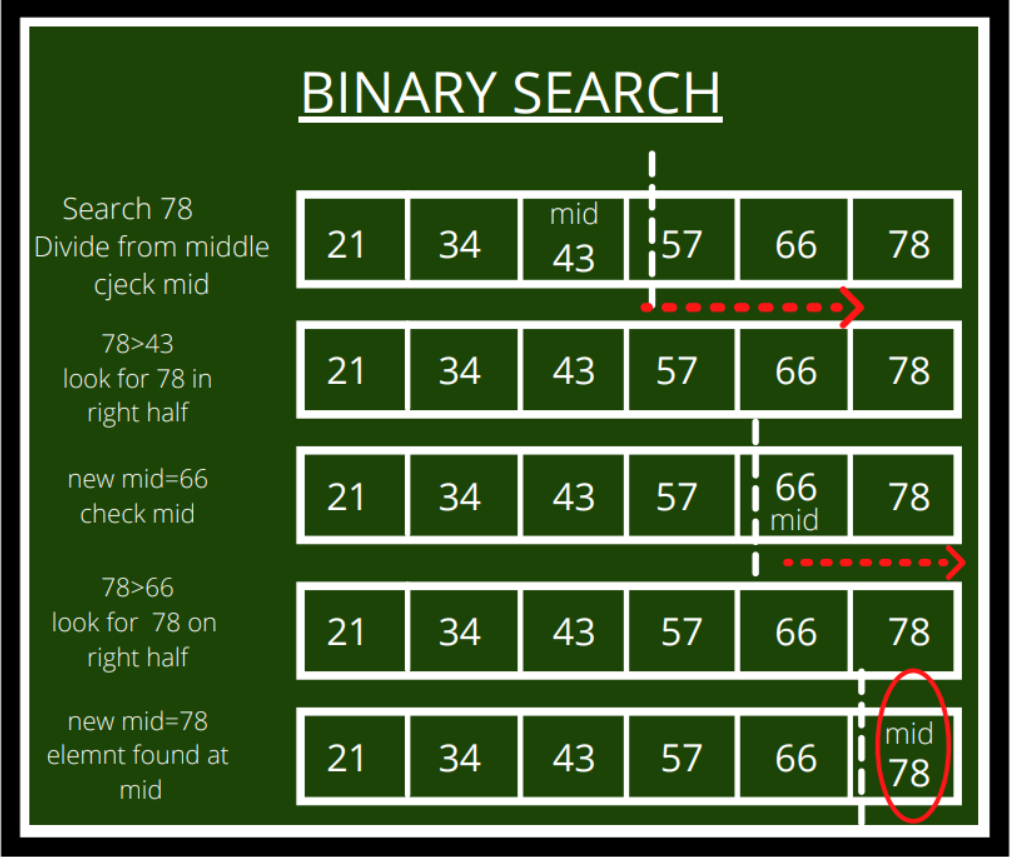

---





3 - Como fazer SHEELSORT?

separa em segmentos
caso sobre elementos na hora da separação,
eu ainda separo em grupo, mas o último grupo será incompleto


  **/4 SEGMENTOS** 
  (separado de 4 em 4 elementos)

      ordena todos os primeiros
             todos os segundos
             todos os terceiros
             todos os quartos

      5 2 9 75        53 15 1 4
      - * ! $          - * ! $

      5 2 1 4         53 15 9 75

**/ 2 SEGMENTOS** (separado de 2 em 2 elementos)
  
      ordena todos os primeiros
             todos os segundos

    5 2         1 4         53 15        9 75
    - *         - *         -  *         -  *

    1 2       5 4      9 15       53 75



**/ 1 SEGMENTO** (separado de 1 em 1 elementos - ÚLTIMO PASSO)

ordena todos os primeiros...

    1   2   5   4  9   15   53   75

    1 2 4 5 9 15 23 75          ordenado!!!

